# Analyze Airbnb Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mping
import seaborn as sns
from wordcloud import WordCloud

In [3]:
# Load Airbnb Dataset
airbnb_data = pd.read_csv('AB_NYC_2019.csv')
print("Shape of airbnb data set:", airbnb_data.shape)
print("Details of the dataset:")
print(airbnb_data.info())

Shape of airbnb data set: (48895, 16)
Details of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-nul

In [4]:
# Remove Deplicates 
airbnb_data.duplicated().sum()
airbnb_data.drop_duplicates(inplace=True)

In [5]:
# Check for Null Values
airbnb_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# Drop Unnecessary columns
airbnb_data.drop(['id', 'name', 'host_name', 'last_review'], axis=1, inplace=True)

In [7]:
# Check the result
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 12 columns):
host_id                           48895 non-null int64
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 4.8+ MB


In [8]:
# Fill NA in review_per_month with 0
airbnb_data.fillna({'reviews_per_month':0}, inplace=True)
airbnb_data.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [9]:
# Remove NaN values from the dataset
airbnb_data.isnull().sum()
airbnb_data.dropna(how='any', inplace=True)
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 12 columns):
host_id                           48895 non-null int64
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 4.8+ MB


In [10]:
# Describe the dataset
airbnb_data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [11]:
keys = airbnb_data.columns
print(keys)

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


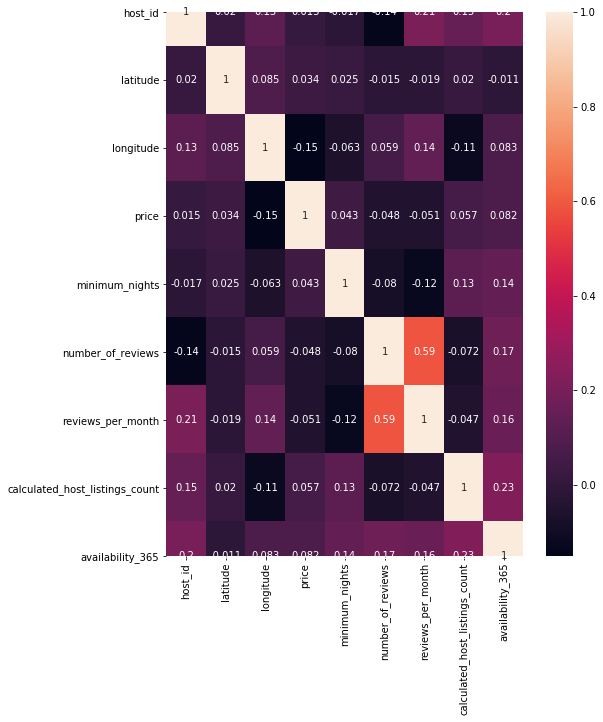

In [12]:
# Check Correlation between each variables
corr = airbnb_data.corr(method='pearson')
plt.figure(figsize=(8,10))
sns.heatmap(corr, annot=True)
plt.show()

# Data Visulization

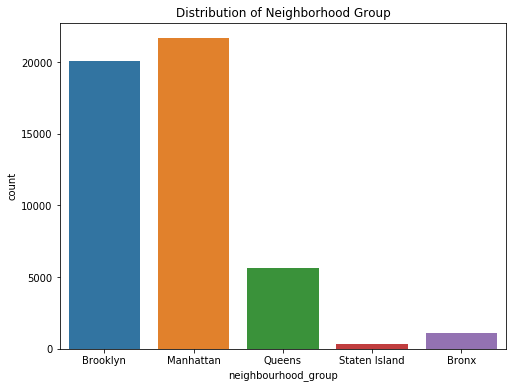

In [13]:
# Neighborhood Group
plt.figure(figsize=(8, 6))
sns.countplot(airbnb_data['neighbourhood_group'])
plt.title("Distribution of Neighborhood Group")
plt.show()

We can find that most apartments are in Manhattan and only a very small number of apartments are in staten Island and Bronx

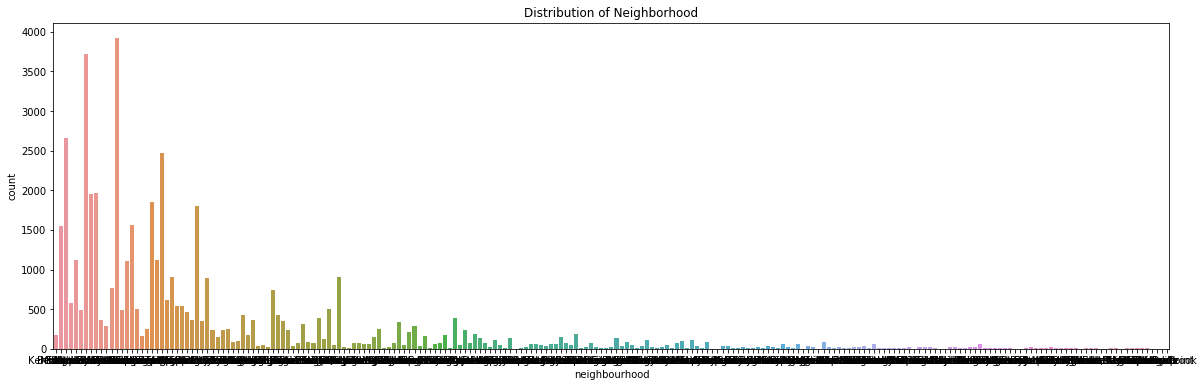

In [14]:
# Neighborhood
plt.figure(figsize=(20, 6))
sns.countplot(airbnb_data['neighbourhood'])
plt.title("Distribution of Neighborhood")
plt.show()

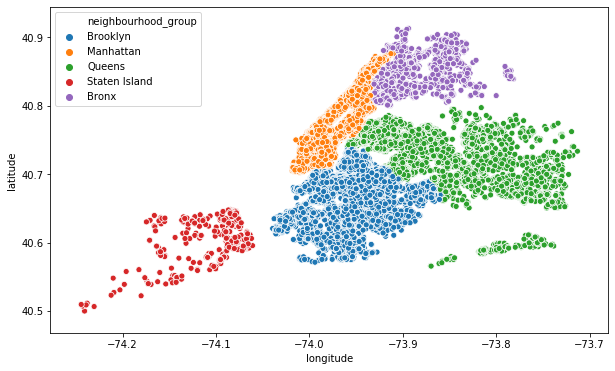

In [15]:
# Draw Scatter plot of the neighborhood
plt.figure(figsize=(10, 6))
sns.scatterplot(airbnb_data.longitude, airbnb_data.latitude, hue=airbnb_data.neighbourhood_group)
plt.show()

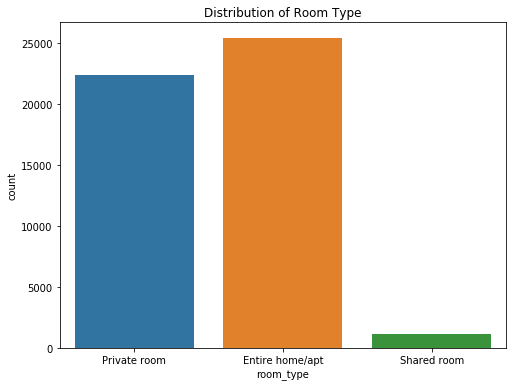

In [16]:
# Check Room Type
plt.figure(figsize=(8, 6))
sns.countplot(airbnb_data['room_type'])
plt.title("Distribution of Room Type")
plt.show()

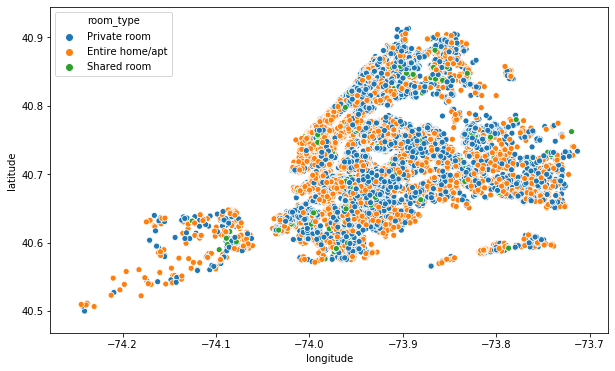

In [17]:
# Draw Scatter plot of the room type
plt.figure(figsize=(10, 6))
sns.scatterplot(airbnb_data.longitude, airbnb_data.latitude, hue=airbnb_data.room_type)
plt.show()

The room type is not very highly correlated with the location

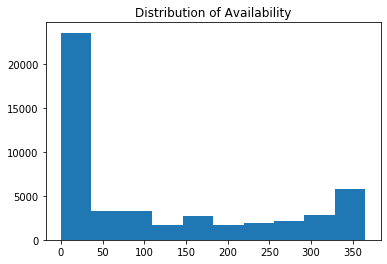

In [18]:
# Check Room Availability
# plt.figure(figsize=(8, 6))
plt.hist(airbnb_data.availability_365)
plt.title("Distribution of Availability")
plt.show()

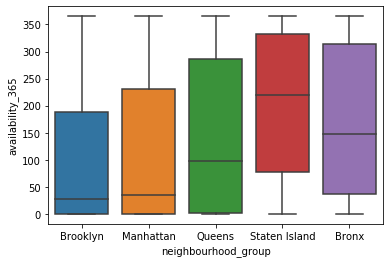

In [19]:
# Boxplot of availability
sns.boxplot(data=airbnb_data, x = 'neighbourhood_group', y = 'availability_365')

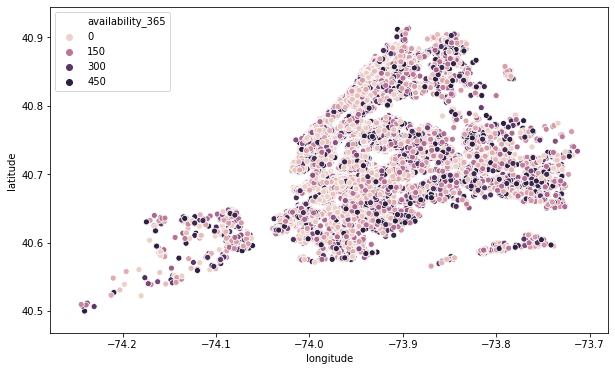

In [20]:
# Draw Scatter plot of the Room Availability
plt.figure(figsize=(10, 6))
sns.scatterplot(airbnb_data.longitude, airbnb_data.latitude, hue=airbnb_data.availability_365)
plt.show()

# Apply Linear Regression

In [23]:
# Drop Columns
airbnb_data.drop(['host_id', 'latitude', 'longitude', 'neighbourhood', 'number_of_reviews', 'reviews_per_month'], axis=1, inplace=True)

In [24]:
# Encode the neighborhood_group and room_type
def Encode(data):
    for column in data.columns[data.columns.isin(['neighbourhood_group', 'room_type'])]:
        data[column] = data[column].factorize()[0]
    return data

airbnb_data_en = Encode(airbnb_data.copy())

In [27]:
airbnb_data_en.head(20)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,149,1,6,365
1,1,1,225,1,2,355
2,1,0,150,3,1,365
3,0,1,89,1,1,194
4,1,1,80,10,1,0
5,1,1,200,3,1,129
6,0,0,60,45,1,0
7,1,0,79,2,1,220
8,1,0,79,2,1,0
9,1,1,150,1,4,188


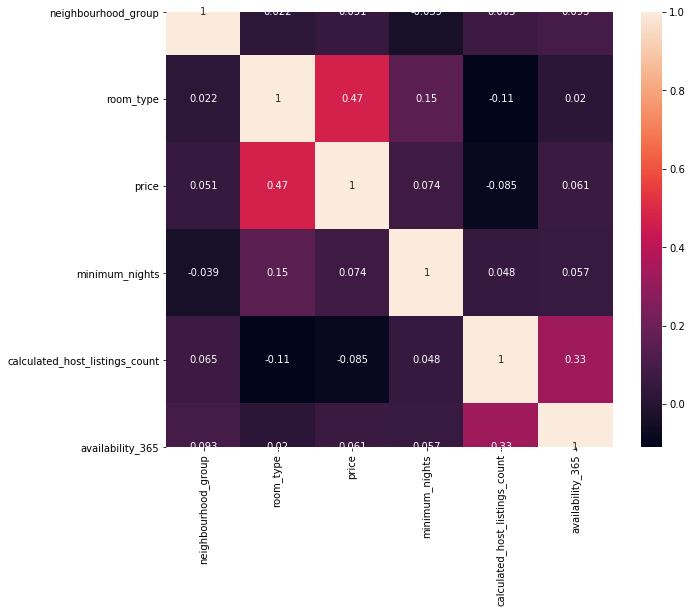

In [31]:
# Get correlation between variables
plt.figure(figsize=(10, 8))
corr = airbnb_data_en.corr(method='kendall')
sns.heatmap(corr, annot=True)

In [42]:
from sklearn.model_selection import train_test_split
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics

In [43]:
# Perpare data
x = airbnb_data_en.iloc[:, [0, 1, 3, 4, 5]]
y = airbnb_data_en.iloc[:, [2]]
# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
print("X Train Shape:", x_train.shape)
print("Y Train Shape:", y_train.shape)
print("X Test Shape:", x_test.shape)
print("Y Test Shape:", y_test.shape)

X Train Shape: (44005, 5)
Y Train Shape: (44005, 1)
X Test Shape: (4890, 5)
Y Test Shape: (4890, 1)


In [44]:
# Set Linear Regression Model
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
# Evaluate 
y_pred = model.predict(x_test)
r2_result = metrics.r2_score(y_test, y_pred)
print(r2_result)

0.039517243953337555
